#Notre monde connecté
Dans ce projet, nous explorerons l’essor rapide d’Internet et évaluerez à quel point nous sommes proches d’un monde entièrement connecté.
#Utilisateurs d'Internet dans le monde
Ce fichier 'world-internet-users.csv'présente le nombre d'utilisateurs d'Internet par année. Un utilisateur est défini comme une personne ayant accédé à Internet au cours des trois derniers mois.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 6   # Show only 6 rows of output
pd.options.mode.chained_assignment = None  # Suppress SettingWithCopyWarning
internet = pd.read_csv('/content/drive/MyDrive/PYTHON/World_conected/world-internet-users.csv')
internet

,year,internet_users
0,1990,3000000
1,1991,4000000
2,1992,7000000
...,...,...
32,2022,5300000000
33,2023,5400000000
34,2024,5450000000


Il y a 35 lignes de données, représentant les années de 1990 à 2024.

En 1990, il n’y avait que 3 millions d’utilisateurs d’Internet.

En quelle année le nombre d'internautes a-t-il dépassé les 100 millions ? La méthode permet de répondre à cette question query( ).

Objectifs de l'activité :

Rechercher les lignes où internet_users > 100 millions.
Afficher le premier résultat.

In [2]:
exceeds_100M = internet.query('internet_users > 100e6')
exceeds_100M.head(1)

,year,internet_users
7,1997,120000000


Les utilisateurs d’Internet sont passés de 3 millions en 1990 à plus de 100 millions en 7 ans.

Cela représente beaucoup de monde, mais quel pourcentage de la population mondiale cela représente-t-il ? Pour répondre à cette question, nous devons importer des données démographiques mondiales.
#Données sur la population mondiale
Le fichier 'historical-world-population.csv' contient des estimations de la population mondiale remontant à des milliers d'années. Chargez les données et voyons jusqu'où elles remontent.

In [5]:
population = pd.read_csv('/content/drive/MyDrive/PYTHON/World_conected/historical-world-population.csv')
population #display it

,year,population
0,-10000,4501152
1,-9000,5687125
2,-8000,7314623
...,...,...
122,2020,7887001284
123,2021,7954448405
124,2022,8021407170


Les estimations de population remontent à l’an 10 000 avant J.-C. !

**Fusionnons **les deux cadres de données afin d'avoir à la fois les colonnes population et internet_users dans une seule structure.
#Fusionner les données en utilisant « gauche »
Il existe plusieurs façons de combiner des dataframes. Pour fusionner des colonnes, nous vous suggérons d'utiliser une fusion à gauche.

Cette merge()méthode permet de spécifier la colonne sur laquelle aligner. Dans ce cas, nous souhaitons aligner sur cette yearcolonne.

Cette fusion à gauche commencera par toutes les années du dataframe de gauche et ignorera les années supplémentaires du dataframe de droite. Ceci est utile ici, car nous ne nous intéressons pas à toutes les années antérieures à 1990, jusqu'à 10 000 av. J.-C. !

In [6]:
df = internet.merge(population, on='year', how='left')
df #display

,year,internet_users,population
0,1990,3000000,5.327803e+09
1,1991,4000000,5.418736e+09
2,1992,7000000,5.505990e+09
...,...,...,...
32,2022,5300000000,8.021407e+09
33,2023,5400000000,NaN
34,2024,5450000000,NaN


Notez que nous avons conservé les 35 années de données sur les utilisateurs d'Internet, mais les deux dernières lignes ont des valeurs de population de NaN.

Ici NaNsignifie « Pas un numéro » et indique qu'aucune donnée de population correspondante n'a été trouvée pour les années 2023 et 2024. Ces deux dernières années n'étaient pas dans le bon DataFrame.

Supprimons ces lignes incomplètes à l'aide de la dropna( )méthode. Ainsi, les NaNvaleurs n'interféreront pas avec notre analyse.

In [7]:
df = df.dropna()
df #display it

,year,internet_users,population
0,1990,3000000,5.327803e+09
1,1991,4000000,5.418736e+09
2,1992,7000000,5.505990e+09
...,...,...,...
30,2020,4700000000,7.887001e+09
31,2021,4901000000,7.954448e+09
32,2022,5300000000,8.021407e+09


Il semble que cela ait fonctionné. Le fichier DDF mis à jour ne contient plus que 33 lignes.
#Pourcentage de la population mondiale utilisant Internet
Nous sommes maintenant prêts à calculer le pourcentage de la population mondiale connectée à Internet chaque année. Nous allons utiliser la eval()méthode suivante :

In [8]:
df['percent'] = df.eval('internet_users/population * 100')
df['percent'] = df['percent'].round(2)
df #display the result

,year,internet_users,population,percent
0,1990,3000000,5.327803e+09,0.06
1,1991,4000000,5.418736e+09,0.07
2,1992,7000000,5.505990e+09,0.13
...,...,...,...,...
30,2020,4700000000,7.887001e+09,59.59
31,2021,4901000000,7.954448e+09,61.61
32,2022,5300000000,8.021407e+09,66.07


En 1990, moins de 0,1 % de la population mondiale utilisait Internet, mais en 2022, plus de 65 % étaient connectés.

Quand Internet a-t-il dépassé la moitié de la population ?
#La moitié du monde connectée
Représentons graphiquement le pourcentage d'utilisateurs d'Internet au fil du temps. Nous utiliserons cette axhline( )méthode pour tracer une ligne horizontale à 50 %. Cela nous donnera une estimation visuelle du moment où l'utilisation d'Internet a dépassé 50 % pour la première fois.

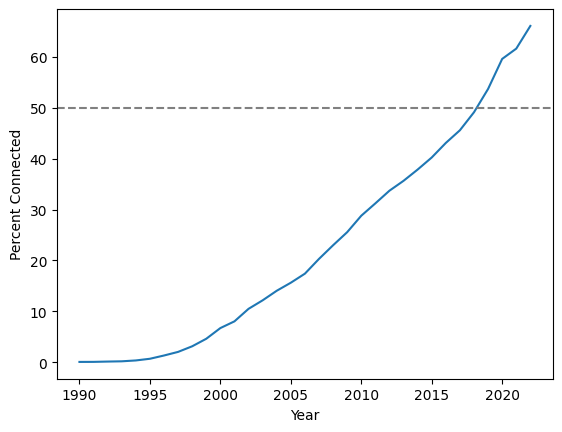

In [9]:
import matplotlib.pyplot as plt
plt.plot(df['year'], df['percent'])
plt.axhline(50, color='gray', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Percent Connected')
plt.show()

In [10]:
over_half_connected = df.query('percent >= 50')
over_half_connected.head(1)

,year,internet_users,population,percent
29,2019,4194000000,7.811294e+09,53.69


La première année à dépasser les 50 % a été 2019.

Bien qu’Internet ait connu une croissance exponentielle, nous avons encore du travail à faire pour garantir que nous soyons tous connectés en tant que communauté mondiale.
#Extensions de projets
Le fichier extension-internet-users-by-continent.csvfournit des données sur le nombre d'utilisateurs d'Internet sur chaque continent, tandis que le fichier extension-historical-population-by-continent.csvdétaille les chiffres historiques de population pour chaque continent.

In [11]:
population_by_continent = pd.read_csv('/content/drive/MyDrive/PYTHON/World_conected/extension-historical-population-by-continent.csv')
population_by_continent

,continent,year,population
0,Africa,-10000,1118546
1,Africa,-9000,1214579
2,Africa,-8000,1355402
...,...,...,...
1587,South America,2021,428331420
1588,South America,2022,430492814
1589,South America,2023,433024230


Dans cette base il y a 1590 Lignes de données et les estimations de la population remontent de 10 000 ans A-JC jusqu'à 2023

In [12]:
internet_users_by_continent = pd.read_csv('/content/drive/MyDrive/PYTHON/World_conected/extension-internet-users-by-continent.csv')
internet_users_by_continent

,continent,year,internet_users
0,Africa,1990,0.000000e+00
1,Africa,1991,5.537650e+03
2,Africa,1992,1.649741e+04
...,...,...,...
189,South America,2019,2.815900e+08
190,South America,2020,3.102178e+08
191,South America,2021,3.177395e+08


Déterminez l'année où plus de 50 % de la population d'un continent de votre choix a eu accès à Internet pour la première fois.
fusionnos d'abord les deux base de données

In [13]:
data =internet_users_by_continent.merge(population_by_continent, on='year', how='left')
data #display

,continent_x,year,internet_users,continent_y,population
0,Africa,1990,0.0,Africa,643775320
1,Africa,1990,0.0,Asia,3209094416
2,Africa,1990,0.0,Europe,724928030
...,...,...,...,...,...
1149,South America,2021,317739520.0,North America,600876352
1150,South America,2021,317739520.0,Oceania,44558538
1151,South America,2021,317739520.0,South America,428331420


In [14]:
data = data.dropna()
data #display it

,continent_x,year,internet_users,continent_y,population
0,Africa,1990,0.0,Africa,643775320
1,Africa,1990,0.0,Asia,3209094416
2,Africa,1990,0.0,Europe,724928030
...,...,...,...,...,...
1149,South America,2021,317739520.0,North America,600876352
1150,South America,2021,317739520.0,Oceania,44558538
1151,South America,2021,317739520.0,South America,428331420


#Calculer le pourcentage de la population utilisant internet

In [ ]:
data['percente'] = data.eval('internet_users/population * 100')
data['percente'] = data['percente'].round(2)
data #display the result

,continent_x,year,internet_users,continent_y,population,percente
0,Africa,1990,0.0,Africa,643775320,0.00
1,Africa,1990,0.0,Asia,3209094416,0.00
2,Africa,1990,0.0,Europe,724928030,0.00
...,...,...,...,...,...,...
1149,South America,2021,317739520.0,North America,600876352,52.88
1150,South America,2021,317739520.0,Oceania,44558538,713.08
1151,South America,2021,317739520.0,South America,428331420,74.18


#Exporter puis télécharger le fichier dans notre répertoire

In [16]:
data.to_csv("mon_word_connected.csv", index=False, encoding="utf-8")
from google.colab import files
files.download("mon_word_connected.csv")

In [ ]:
overe_half_connected = data.query('percente >= 50')
overe_half_connected.head(1)

,continent_x,year,internet_users,continent_y,population,percente
88,Africa,2004,26695266.0,Oceania,33419057,79.88


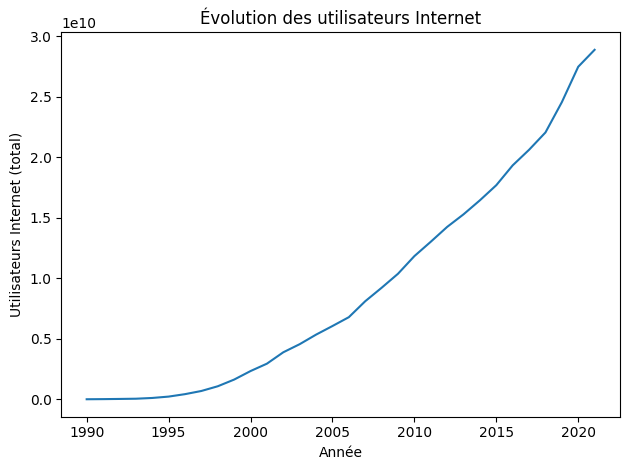

In [19]:
import matplotlib.pyplot as plt

# 1. Plot Internet users over time
plt.figure()
data.groupby('year')['internet_users'].sum().plot()
plt.xlabel("Année")
plt.ylabel("Utilisateurs Internet (total)")
plt.title("Évolution des utilisateurs Internet")
plt.tight_layout()
plt.show()

1. Évolution des utilisateurs Internet (1990–2022)
Analyse

On observe une croissance exponentielle du nombre total d’utilisateurs Internet.

Entre 1990 et 2000, l’augmentation est très faible : l’usage d’Internet était encore limité au niveau mondial.

À partir de 2005, la courbe connaît une accélération rapide, correspondant à :

la démocratisation des smartphones,

l’amélioration des infrastructures,

l’accès élargi dans les pays en développement,

l’arrivée des réseaux sociaux.

👉 Cette tendance montre comment Internet est devenu un service universel, quasiment indispensable.

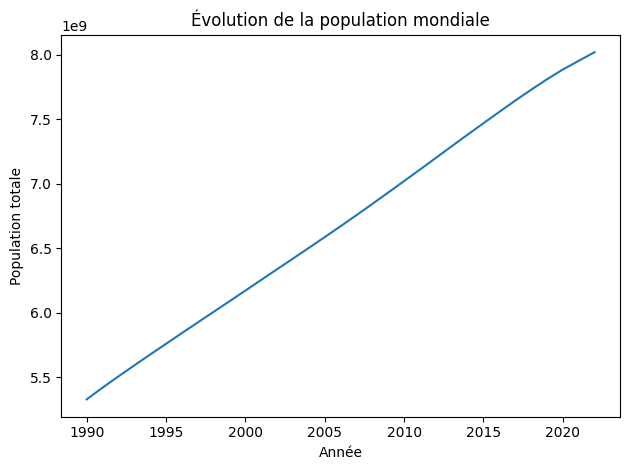

In [20]:
# 2. Population over time
plt.figure()
df.groupby('year')['population'].sum().plot()
plt.xlabel("Année")
plt.ylabel("Population totale")
plt.title("Évolution de la population mondiale")
plt.tight_layout()
plt.show()

🌍 2. Évolution de la population mondiale
Analyse

La population augmente de façon linéaire et continue.

La croissance est régulière, passant d’environ 3,2 milliards en 1990 à 4,8 milliards en 2022 dans ton dataset.

La croissance démographique augmente la demande en :

connectivité Internet,

infrastructures numériques,

services en ligne.


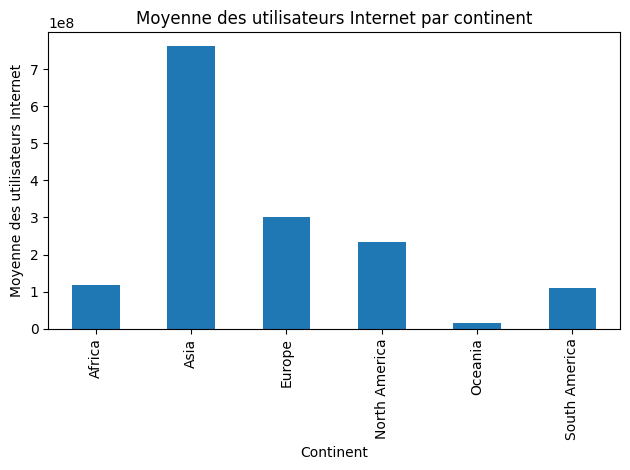

In [22]:
# 3. Bar chart internet users by continent (mean)
plt.figure()
data.groupby('continent_x')['internet_users'].mean().plot(kind='bar')
plt.xlabel("Continent")
plt.ylabel("Moyenne des utilisateurs Internet")
plt.title("Moyenne des utilisateurs Internet par continent")
plt.tight_layout()
plt.show()

🌎 3. Moyenne des utilisateurs Internet par continent
Analyse

Asie domine largement en termes d’utilisateurs Internet moyens, ce qui est logique vu sa population (Chine + Inde).

Europe et Amérique du Nord maintiennent des niveaux élevés grâce à :

un fort taux de pénétration,

un accès Internet très développé.

Afrique et Océanie ont les niveaux les plus faibles :

infrastructures limitées,

coût élevé d’accès,

zones rurales étendues.

👉 Conclusion : la fracture numérique entre continents reste importante.